  **Flight delays are a common occurrence in the airline industry and can have a significant impact on travelers, airlines, and airports. Predicting flight delays accurately can help airlines and passengers make informed decisions, such as adjusting travel plans, managing resources, and minimizing disruptions. By leveraging historical flight data and machine learning techniques, it is possible to develop models that can predict the likelihood of flight delays. Here a Kaggle dataset is used for such flight delay prediction (https://www.kaggle.com/divyansh22/flight-delay-prediction). The data is month of January from the Bureau of Transportation Statistics, Govt. of the USA. This dataset contains all the flights in the month of January 2019 and January 2020.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2019 = pd.read_csv('C:\\Users\\akgat\\Documents\\machine learning\\capstone project 1\\Jan_2019_ontime.csv')
df_2020 = pd.read_csv('C:\\Users\\akgat\\Documents\\machine learning\\capstone project 1\\Jan_2020_ontime.csv')

In [3]:
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [41]:
df_2020.tail()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN
607345,31,5,9E,20363,9E,N228PQ,4815,15919,1591904,XNA,...,ATL,1841.0,0.0,1800-1859,2128.0,0.0,0.0,0.0,589.0,NaN


In [42]:
print(df_2020.shape)
print(df_2020['Unnamed: 21'].isnull().sum())

(607346, 22)
607346


# **Unnamed: 21 already empty. We will clean this column at preprocessing step.**

In [43]:
def bar_plot(variable):
    var = df_2020[variable] # get feature
    varValue = var.value_counts() # count number of categorical variable(value/sample)
    
    plt.figure(figsize = (9,6))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable,varValue))

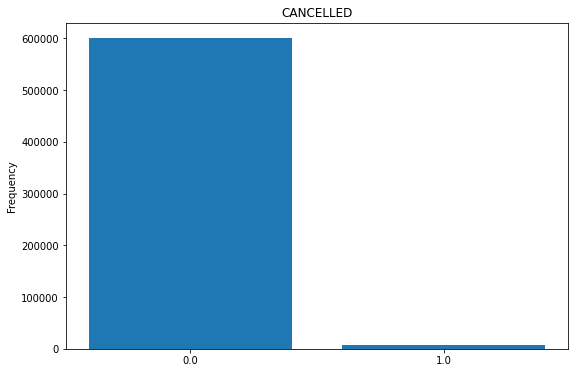

CANCELLED 
 0.0    600418
1.0      6928
Name: CANCELLED, dtype: int64


In [44]:
bar_plot('CANCELLED')

In [45]:
print(df_2020.columns)
print(df_2020.shape[1])

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')
22


# **22 column and their names**

In [46]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

# **How much NaN Value**

In [47]:
column_names = df_2020.columns
j=0
for i in df_2020.columns:
    print("  {} has got {} Null Sample " .format(df_2020.columns[j],df_2020[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH has got 0 Null Sample 
  DAY_OF_WEEK has got 0 Null Sample 
  OP_UNIQUE_CARRIER has got 0 Null Sample 
  OP_CARRIER_AIRLINE_ID has got 0 Null Sample 
  OP_CARRIER has got 0 Null Sample 
  TAIL_NUM has got 698 Null Sample 
  OP_CARRIER_FL_NUM has got 0 Null Sample 
  ORIGIN_AIRPORT_ID has got 0 Null Sample 
  ORIGIN_AIRPORT_SEQ_ID has got 0 Null Sample 
  ORIGIN has got 0 Null Sample 
  DEST_AIRPORT_ID has got 0 Null Sample 
  DEST_AIRPORT_SEQ_ID has got 0 Null Sample 
  DEST has got 0 Null Sample 
  DEP_TIME has got 6664 Null Sample 
  DEP_DEL15 has got 6699 Null Sample 
  DEP_TIME_BLK has got 0 Null Sample 
  ARR_TIME has got 7075 Null Sample 
  ARR_DEL15 has got 8078 Null Sample 
  CANCELLED has got 0 Null Sample 
  DIVERTED has got 0 Null Sample 
  DISTANCE has got 0 Null Sample 
  Unnamed: 21 has got 607346 Null Sample 


<AxesSubplot:>

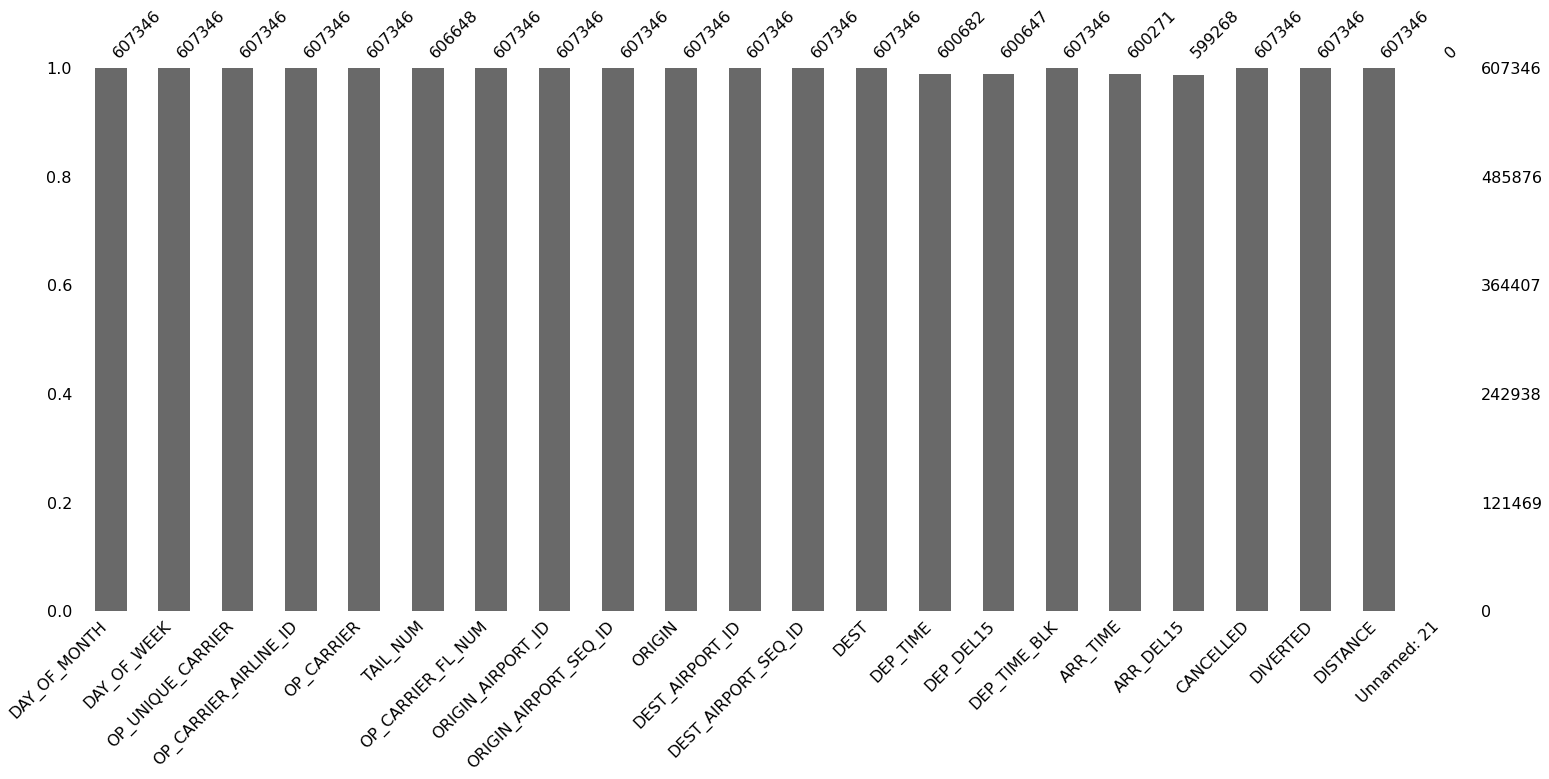

In [48]:
import missingno as msno
plt.figure(figsize=(4,4))
msno.bar(df_2020)

<AxesSubplot:>

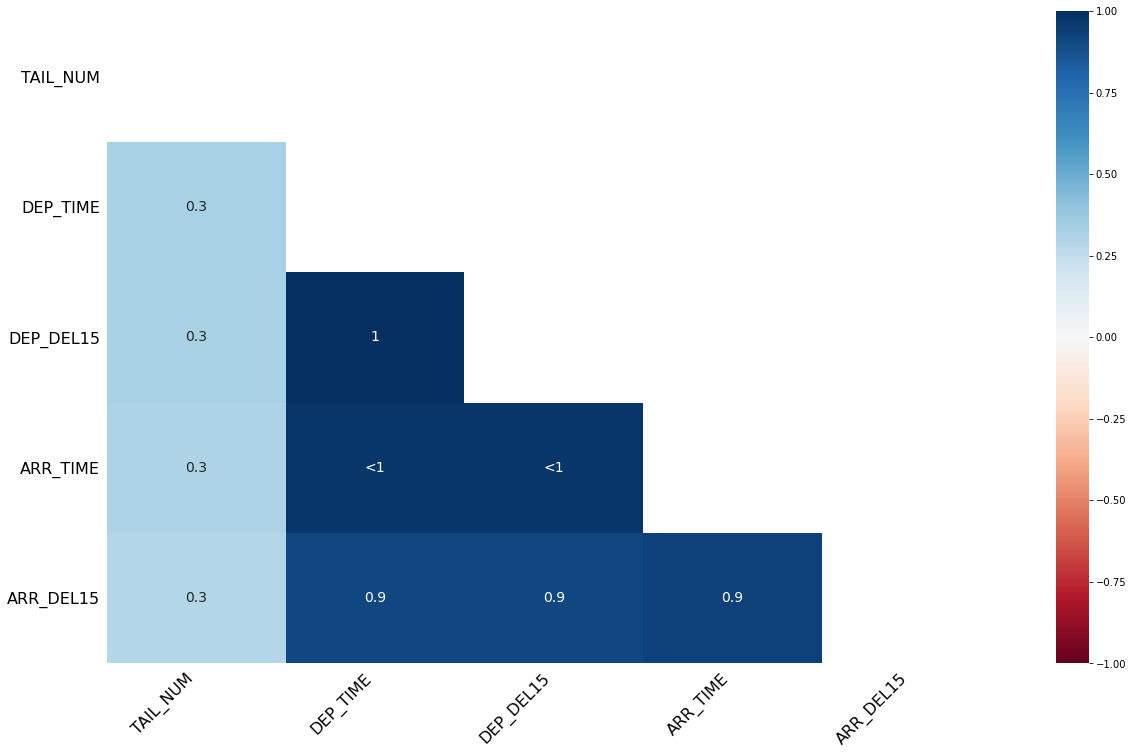

In [49]:
msno.heatmap(df_2020) 

# **-O-O- PREPROCESSING -0-0-**

# **Unnamed: 21**

In [50]:
#Data Preprocessing
df_2020 = df_2020.drop(['Unnamed: 21'],axis=1)
df_2020.shape

(607346, 21)

# TAIL NUM

In [51]:
#Drop NaN TAIL_NUM rows
df_2020 = df_2020.dropna(subset=['TAIL_NUM'])
print(df_2020['TAIL_NUM'].isna().sum())
print(df_2020.shape)

0
(606648, 21)


# **DEP_DEL15**

# **if not type 15min delay :  we filled with 0**

In [52]:
df_2020['DEP_DEL15'] = df_2020['DEP_DEL15'].replace(np.NaN,0)
df_2020['DEP_DEL15'].isnull().sum()

0

# **ARR_DEL15**

# if not type 15 min delay : we filled 0

In [53]:
df_2020['ARR_DEL15'] = df_2020['ARR_DEL15'].replace(np.NaN,0)
df_2020['ARR_DEL15'].isnull().sum()

0

# **DEP_TIME and ARR_TIME**

In [54]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
#DEP_TIME

df_2020['DEP_TIME'] = imp_mean.fit_transform(df_2020[['DEP_TIME']])
#ARR_TIME

df_2020['ARR_TIME'] = imp_mean.fit_transform(df_2020[['ARR_TIME']])

# **We filled NaN values with column's mean**

# **CHECK NaN VALUES**

In [55]:
column_names = df_2020.columns
j=0
for i in df_2020.columns:
    print("  {} has got {} NaN Sample " .format(df_2020.columns[j],df_2020[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH has got 0 NaN Sample 
  DAY_OF_WEEK has got 0 NaN Sample 
  OP_UNIQUE_CARRIER has got 0 NaN Sample 
  OP_CARRIER_AIRLINE_ID has got 0 NaN Sample 
  OP_CARRIER has got 0 NaN Sample 
  TAIL_NUM has got 0 NaN Sample 
  OP_CARRIER_FL_NUM has got 0 NaN Sample 
  ORIGIN_AIRPORT_ID has got 0 NaN Sample 
  ORIGIN_AIRPORT_SEQ_ID has got 0 NaN Sample 
  ORIGIN has got 0 NaN Sample 
  DEST_AIRPORT_ID has got 0 NaN Sample 
  DEST_AIRPORT_SEQ_ID has got 0 NaN Sample 
  DEST has got 0 NaN Sample 
  DEP_TIME has got 0 NaN Sample 
  DEP_DEL15 has got 0 NaN Sample 
  DEP_TIME_BLK has got 0 NaN Sample 
  ARR_TIME has got 0 NaN Sample 
  ARR_DEL15 has got 0 NaN Sample 
  CANCELLED has got 0 NaN Sample 
  DIVERTED has got 0 NaN Sample 
  DISTANCE has got 0 NaN Sample 


In [56]:
df_2020.shape

(606648, 21)

# We cleaned data but we lost (607346 - 600271 = 7075) sample

# **--------------------------------------------------------------------------------------------------------**

# CORRELATION MATRIX

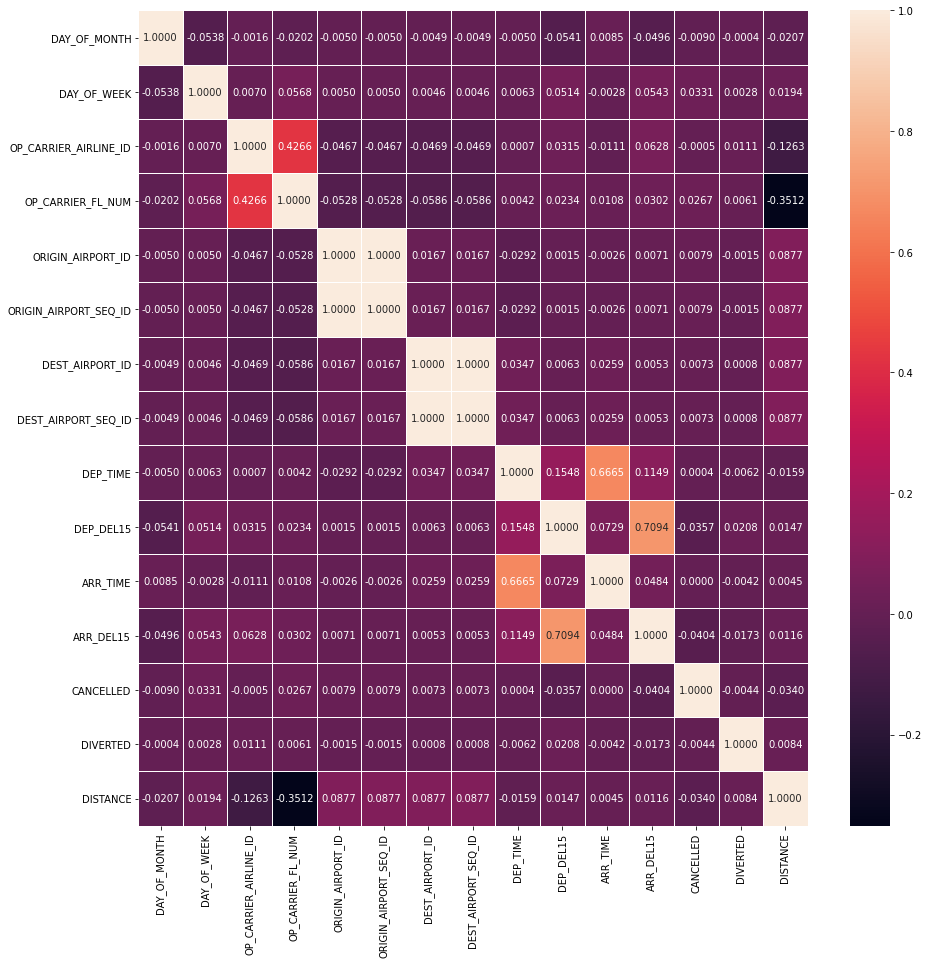

In [57]:
import seaborn as sns
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(df_2020.corr(),linewidths=.5,annot=True,fmt='.4f',ax=ax)
plt.show()

# DEST_AIRPORT_ID - DEST_AIRPORT_SEQ_ID  and  ORIGIN_AIRPORT_ID - ORIGIN_AIRPORT_SEQ_ID  They are looking same so I gonna drop each one of them

In [58]:
df_2020 = df_2020.drop(['DEST_AIRPORT_SEQ_ID'],axis=1)
df_2020 = df_2020.drop(['ORIGIN_AIRPORT_SEQ_ID'],axis=1)
print(df_2020.shape)

(606648, 19)


# **I'm looking my target feature**

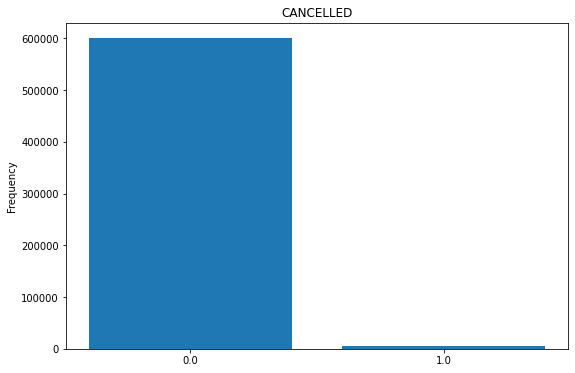

CANCELLED 
 0.0    600418
1.0      6230
Name: CANCELLED, dtype: int64


In [59]:
bar_plot('CANCELLED')

# Data set is imbalance. So we can't trust accuracy metric. We will check other metrics.

# TRAIN - TEST SPLIT

In [60]:
y = df_2020.CANCELLED
df_2020 = df_2020.drop('CANCELLED',axis=1)
X = df_2020

In [61]:
categorical_columns = ['OP_CARRIER','OP_UNIQUE_CARRIER','TAIL_NUM','ORIGIN','DEST','DEP_TIME_BLK']
for col in categorical_columns:
    X_encoded = pd.get_dummies(X[col],prefix_sep = '_')
    df_2020 = df_2020.drop([col],axis=1)

df_2020 = pd.concat([df_2020, X_encoded], axis=1)

In [62]:
X = df_2020

# **We applied One-Hot Encoder for categorical columns**

In [63]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

# **Seperated train and test data**

# **Decision Tree Classifier**

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 0)
model_dt = clf_dt.fit(X_train, y_train) 

[Text(0.6, 0.875, 'X[8] <= 1488.984\ngini = 0.02\nsamples = 424653\nvalue = [420325, 4328]'),
 Text(0.4, 0.625, 'X[8] <= 1468.484\ngini = 0.04\nsamples = 209452\nvalue = [205124, 4328]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 205019\nvalue = [205019, 0]'),
 Text(0.6, 0.375, 'X[10] <= 0.5\ngini = 0.046\nsamples = 4433\nvalue = [105, 4328]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 4328\nvalue = [0, 4328]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 215201\nvalue = [215201, 0]')]

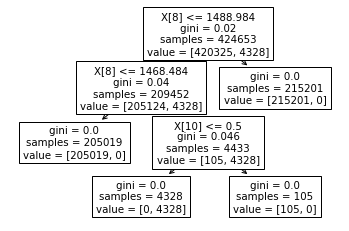

In [65]:
from sklearn import tree
tree.plot_tree(model_dt) 

In [66]:
from sklearn import metrics
y_pred = model_dt.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      1.00      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



In [67]:
y_test.value_counts()

0.0    180093
1.0      1902
Name: CANCELLED, dtype: int64

# **Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=50)
model_rf = clf_rf.fit(X_train, y_train)

In [69]:
from sklearn import metrics
y_pred = model_rf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      0.99      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



# **Ada Boost Classifier**

In [70]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = RandomForestClassifier()
model_ab = clf_ab.fit(X_train, y_train)

In [71]:
from sklearn import metrics
y_pred = model_ab.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      0.99      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



# **XGBoost Classifier**

In [72]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()
model_xgb = clf_xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\epam\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
from sklearn import metrics
y_pred = model_xgb.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      1.00      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



# Summary

As part of this project the following tasks are performed:

- Downloaded a real-world dataset from a Kaggle competition and identified a problem to work on with the dataset, stated the modeling objective with clarity.
- Performed exploratory data analysis to gather insights, perform feature engineering, created a training, validation & test split, and prepared the data for modeling.
- Trained and evaluated different machine learning models such as Logistic Regression, Decision Tree, Random Forest and XGBoost, tuned hyperparameters to improve models.
- The final performance of best models are evaluated with an unseen test data and also compared models with dump models created from good understanding of data.
- Implemented function for sample predictions, and saved model weights and loaded back and tested.

## References

1. The dataset used for project is obtaned from Kaggle and can be found at https://www.kaggle.com/divyansh22/flight-delay-prediction

2. Tutorial for pandas from Data camp -https://www.datacamp.com/tutorial/pandas

3. Decision Tree and Random Forest tutorial from  https://towardsdatascience.com/decision-tree-and-random-forest-from-scratch-4c12b351fe5e

# Future Work

- **The model developed mainly depends on departure delay column for its predictions, an interesting problem would be trying to build models that do not use departure delays for predicting delay on arrival.**


- **Conduct a thorough hyperparameter tuning process for selected models to optimize their performance. This can be done using techniques like grid search, random search, or Bayesian optimization.**